In [11]:
import sys
from time import time

In [12]:
category_list = [
    'Person', 'Location', 'Event', 'Organization', 'DateTime', 'PersonType', 'Currency', 'Nationality', 'Thing'
]

Time to import features: 0.54 mins


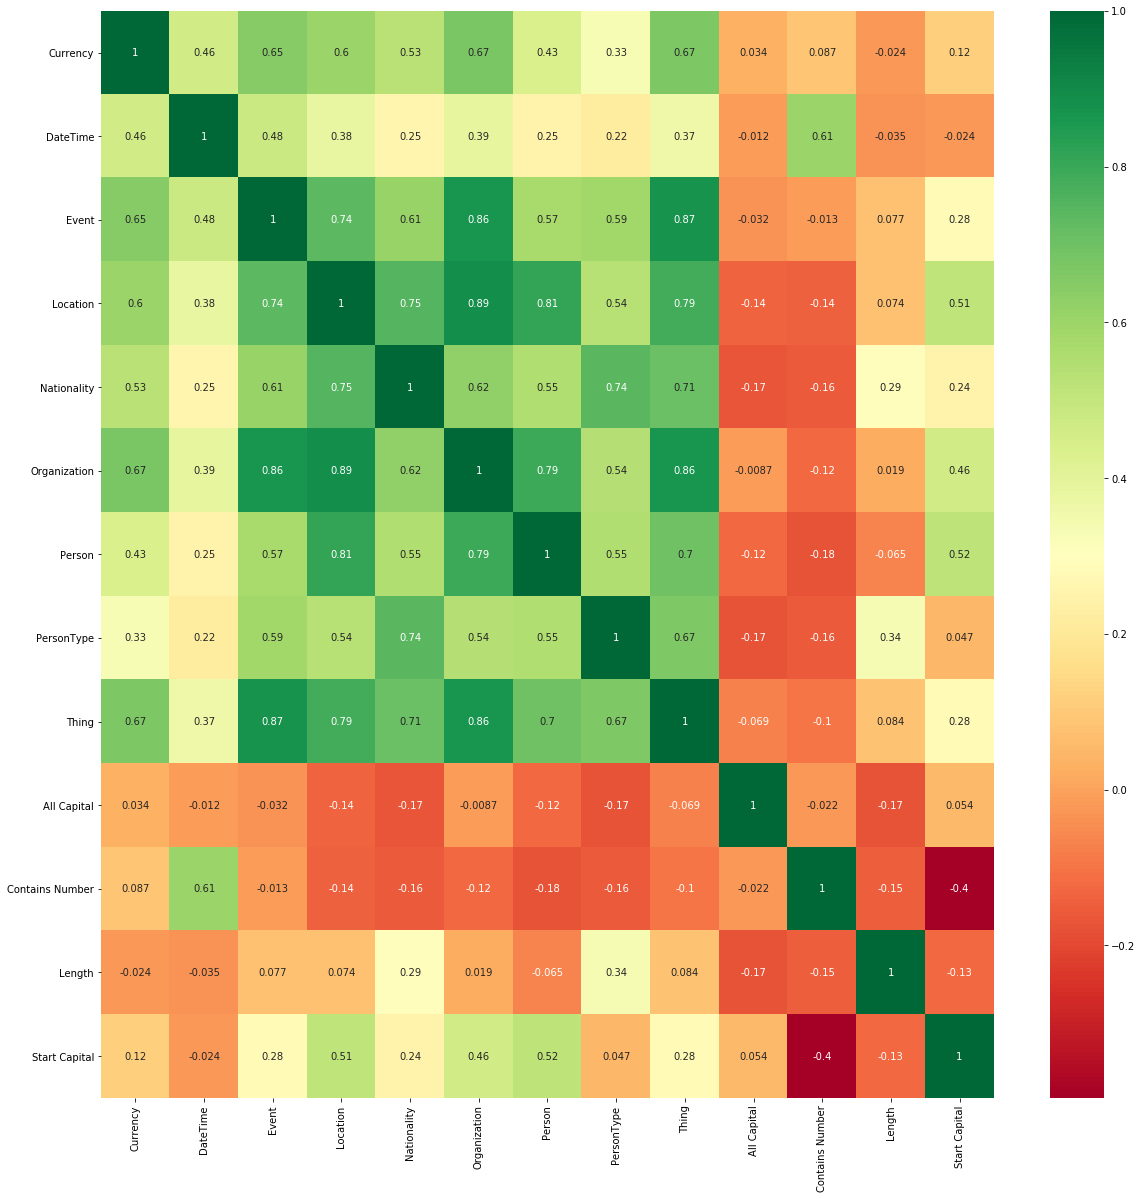

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

t = time()

category_vectors = {}
for category in category_list:
    category_vectors[category] = []
    
# Read labeled words
df = pd.read_excel('data/all_features_v2.xlsx')

X = df.iloc[:,0:12]  # features
y = df.iloc[:,-1]    # label column
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

print('Time to import features: {} mins'.format(round((time() - t) / 60, 2)))

In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
out = le.fit_transform(category_list)
print(le.inverse_transform(out))

['Person' 'Location' 'Event' 'Organization' 'DateTime' 'PersonType'
 'Currency' 'Nationality' 'Ethnicity' 'Thing']


[0.07059831 0.07786695 0.07673988 0.13278725 0.08233127 0.08662413
 0.18225863 0.09597795 0.08327998 0.00456211 0.02800491 0.06134448
 0.01762415]


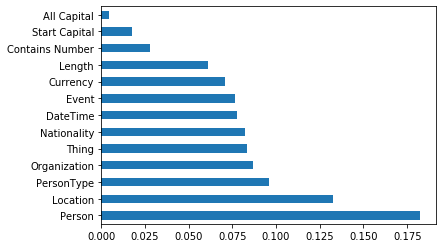

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing

data = pd.read_excel('data/all_features_v1_dataset.xlsx')

le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

X = data.iloc[:,0:13]  # features
y = data.iloc[:,-1]    # label column

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()
